<a href="https://colab.research.google.com/github/aureliowozhiak/Bootcamp-Data-Science-Aplicada/blob/main/notebooks/03.2%20-%20Primeiras%20previs%C3%B5es.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 03.1 - Primeiras previsões
## Análise e Previsão de Séries Temporais

Origem do Dataset: https://www.seade.gov.br/coronavirus/
Cópia feita pela Alura: https://github.com/alura-cursos/Prophet_covid/blob/main/dados_covid_sp.zip


In [57]:
url = 'https://github.com/alura-cursos/Prophet_covid/raw/main/dados_covid_sp.zip'

In [58]:
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from pandas.plotting import autocorrelation_plot
import warnings
warnings.filterwarnings("ignore")

In [59]:
dados = pd.read_csv(url, sep = ';', compression='zip')
dados.head()

,nome_munic,codigo_ibge,dia,mes,datahora,casos,casos_novos,casos_pc,casos_mm7d,obitos,obitos_novos,obitos_pc,obitos_mm7d,letalidade,nome_ra,cod_ra,nome_drs,cod_drs,pop,pop_60,area,map_leg,map_leg_s,latitude,longitude,semana_epidem
0,Adamantina,3500105,25,2,2020-02-25,0,0,"0,000000e+00","0,0000000",0,0,"0,000000e+00","0,0000000","0,0000000000",RA de Presidente Prudente,9,Marília,5,33894,7398,41199,0,8.0,"-21,6820","-51,0737",9
1,Adolfo,3500204,25,2,2020-02-25,0,0,"0,000000e+00","0,0000000",0,0,"0,000000e+00","0,0000000","0,0000000000",RA de São José do Rio Preto,14,São José do Rio Preto,15,3447,761,21106,0,8.0,"-21,2325","-49,6451",9
2,Aguaí,3500303,25,2,2020-02-25,0,0,"0,000000e+00","0,0000000",0,0,"0,000000e+00","0,0000000","0,0000000000",RA de Campinas,4,São João da Boa Vista,14,35608,5245,47455,0,8.0,"-22,0572","-46,9735",9
3,Águas da Prata,3500402,25,2,2020-02-25,0,0,"0,000000e+00","0,0000000",0,0,"0,000000e+00","0,0000000","0,0000000000",RA de Campinas,4,São João da Boa Vista,14,7797,1729,14267,0,8.0,"-21,9319","-46,7176",9
4,Águas de Lindóia,3500501,25,2,2020-02-25,0,0,"0,000000e+00","0,0000000",0,0,"0,000000e+00","0,0000000","0,0000000000",RA de Campinas,4,Campinas,3,18374,3275,6013,0,8.0,"-22,4733","-46,6314",9


In [60]:
dados['datahora'] = pd.to_datetime(dados['datahora'],format='%Y-%m-%d')

In [61]:
mpl.rcParams['font.size'] = 18
mpl.rcParams['figure.figsize'] = (15,8)

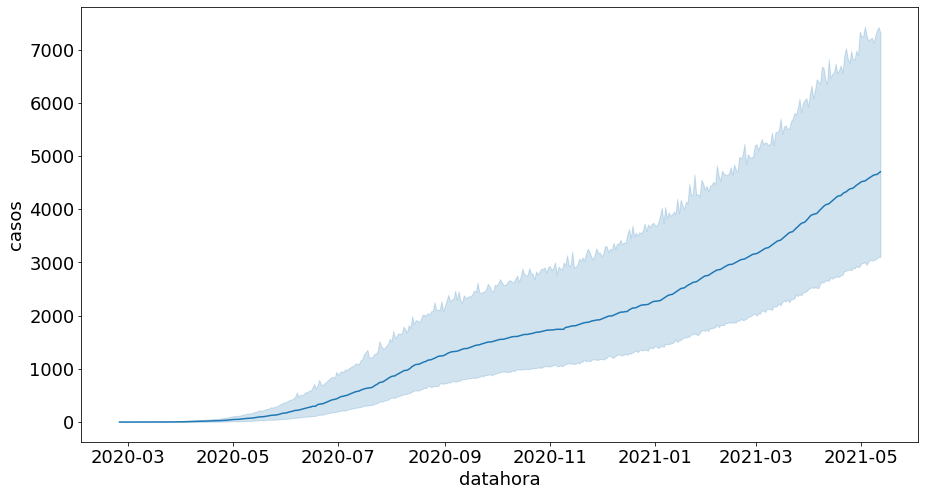

In [62]:
sns.lineplot(data=dados, x='datahora', y='casos')

In [63]:
dados_sp = dados.query('nome_munic == "São Paulo"')

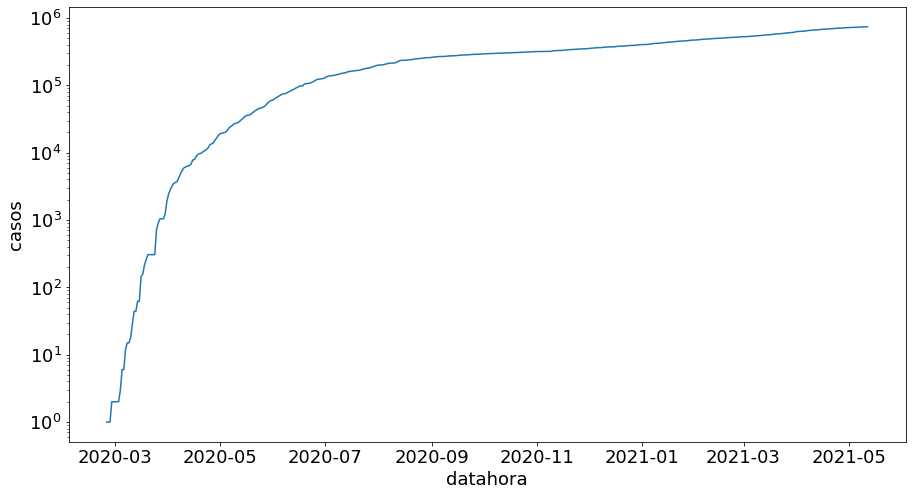

In [64]:
sns.lineplot(data=dados_sp, x='datahora', y='casos')
mpl.pyplot.yscale('log')

In [65]:
dados_praia_grande = dados[dados['nome_munic'] == 'Praia Grande']

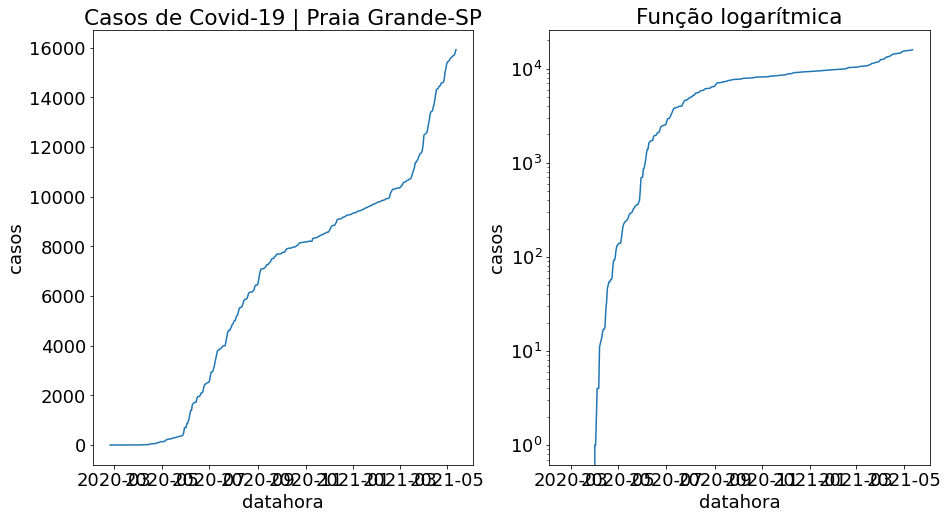

In [66]:
import math

fig, ax = plt.subplots(1,2)

sns.lineplot(data=dados_praia_grande, x='datahora', y='casos', ax=ax[0]).set_title('Casos de Covid-19 | Praia Grande-SP')

sns.lineplot(data=dados_praia_grande, x='datahora', y='casos', ax=ax[1]).set_title('Função logarítmica')

mpl.pyplot.yscale('log')

fig.show()

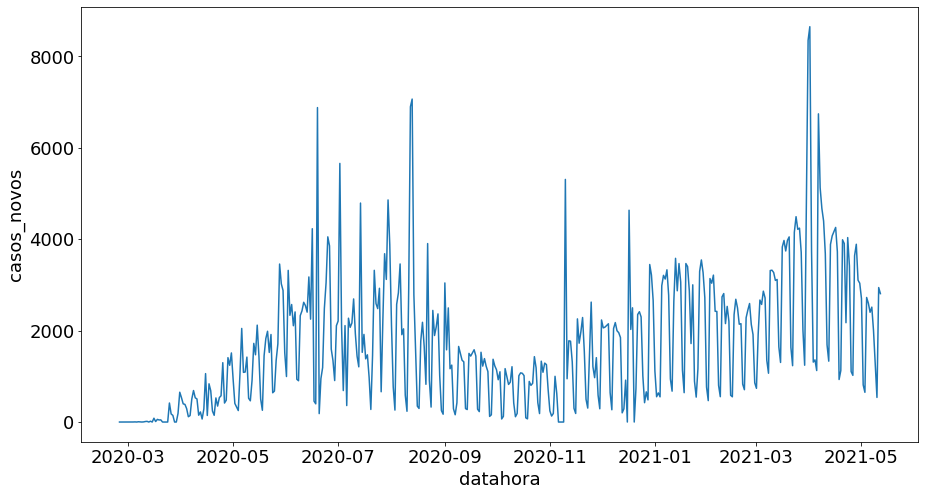

In [67]:
sns.lineplot(data=dados_sp, x='datahora', y='casos_novos')

In [68]:
dados_exemplo = pd.DataFrame(data=np.linspace(1,10,10))

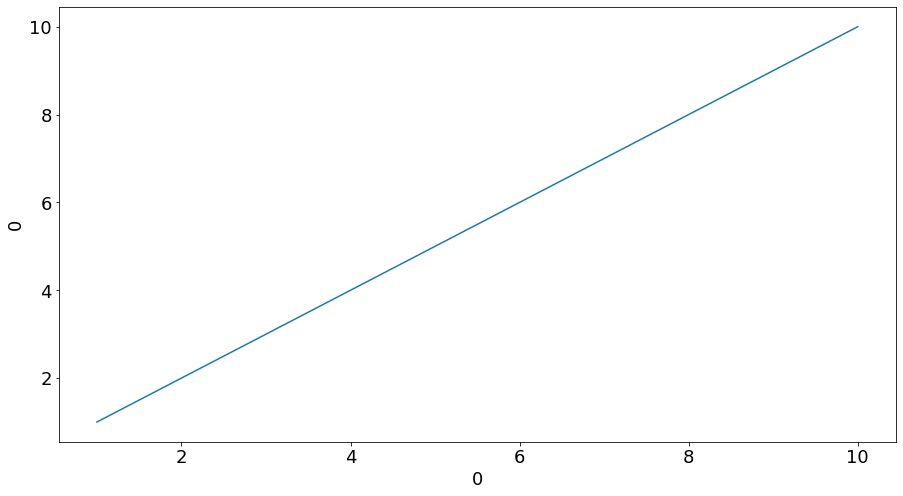

In [69]:
sns.lineplot(data=dados_exemplo, x=0, y=0)

In [70]:
dados_sp['taxa_de_crescimento_casos'] = dados_sp['casos_novos'].diff()
dados_sp['taxa_de_crescimento_obitos'] = dados_sp['obitos_novos'].diff()

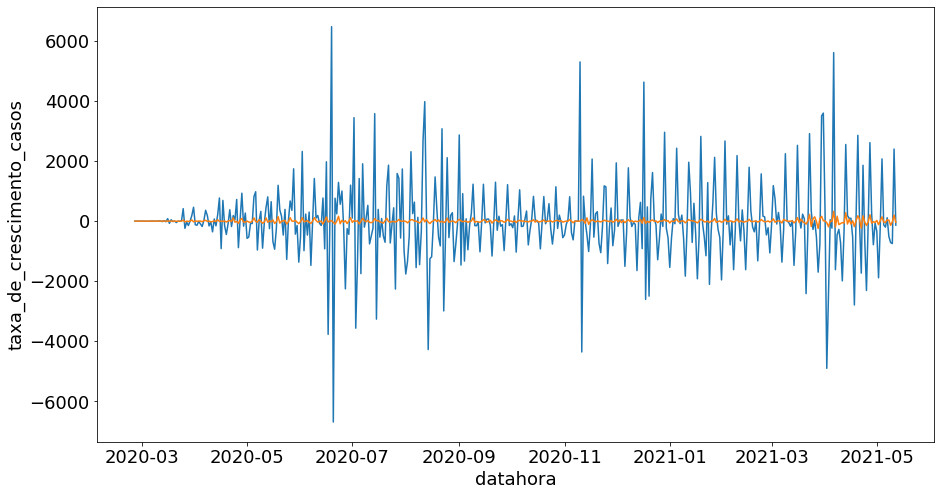

In [71]:
sns.lineplot(data=dados_sp, x='datahora', y='taxa_de_crescimento_casos')
sns.lineplot(data=dados_sp, x='datahora', y='taxa_de_crescimento_obitos')

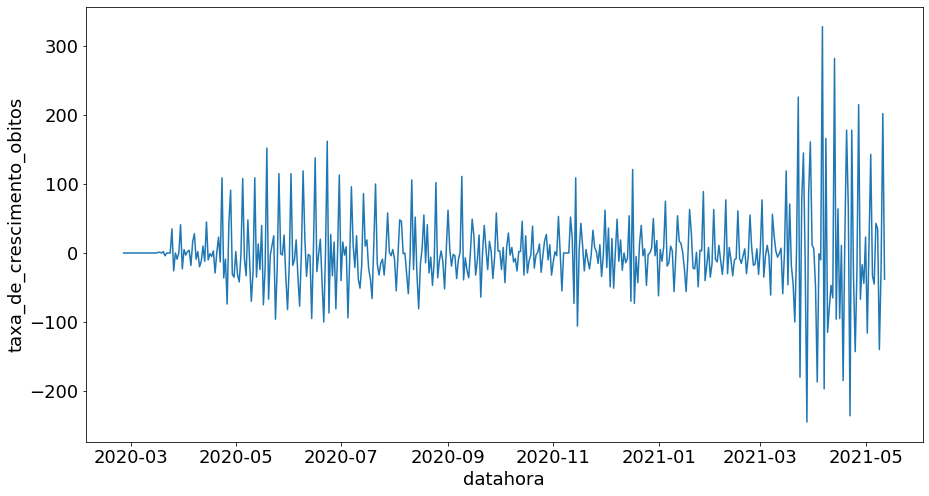

In [72]:
sns.lineplot(data=dados_sp, x='datahora', y='taxa_de_crescimento_obitos')

<BarContainer object of 443 artists>

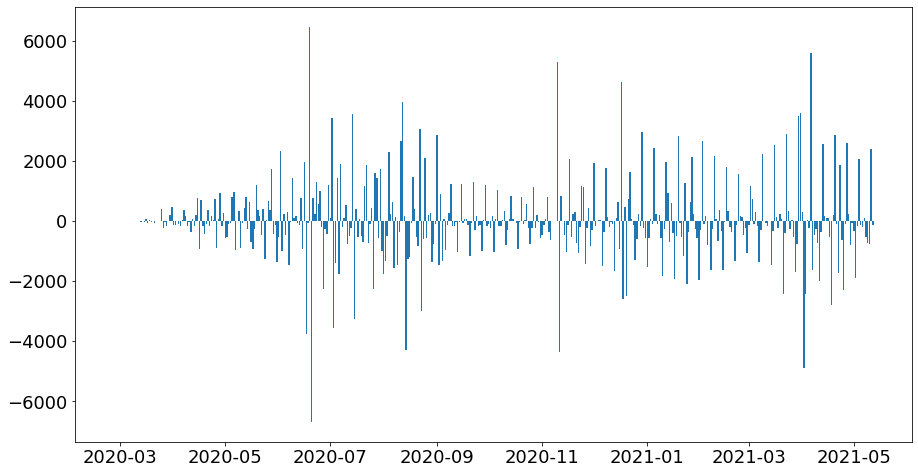

In [73]:
plt.bar(dados_sp['datahora'], dados_sp['taxa_de_crescimento_casos'])

In [74]:
dados_sp['ano'] = pd.DatetimeIndex(dados_sp['datahora']).year

In [75]:
dados_sp_2021 = dados_sp.query('ano == 2021')

In [76]:
dados_sp_2021

,nome_munic,codigo_ibge,dia,mes,datahora,casos,casos_novos,casos_pc,casos_mm7d,obitos,obitos_novos,obitos_pc,obitos_mm7d,letalidade,nome_ra,cod_ra,nome_drs,cod_drs,pop,pop_60,area,map_leg,map_leg_s,latitude,longitude,semana_epidem,taxa_de_crescimento_casos,taxa_de_crescimento_obitos,ano
201157,São Paulo,3550308,1,1,2021-01-01,402835,1117,"3,393821e+03","1714,4285714",15695,16,"1,322279e+02","35,1428571","0,0389613614",RM de São Paulo,10,Grande São Paulo,10,11869660,1853286,152111,>5000,1.0,"-23,5329","-46,6395",53,-1540.0,-62.0,2021
201802,São Paulo,3550308,2,1,2021-01-02,403388,553,"3,398480e+03","1733,0000000",15716,21,"1,324048e+02","37,1428571","0,0389600087",RM de São Paulo,10,Grande São Paulo,10,11869660,1853286,152111,>5000,1.0,"-23,5329","-46,6395",53,-564.0,5.0,2021
202447,São Paulo,3550308,3,1,2021-01-03,404025,637,"3,403846e+03","1729,7142857",15725,9,"1,324806e+02","37,4285714","0,0389208589",RM de São Paulo,10,Grande São Paulo,10,11869660,1853286,152111,>5000,1.0,"-23,5329","-46,6395",1,84.0,-12.0,2021
203092,São Paulo,3550308,4,1,2021-01-04,404576,551,"3,408489e+03","1739,2857143",15743,18,"1,326323e+02","38,0000000","0,0389123428",RM de São Paulo,10,Grande São Paulo,10,11869660,1853286,152111,>5000,1.0,"-23,5329","-46,6395",1,-86.0,9.0,2021
203737,São Paulo,3550308,5,1,2021-01-05,407557,2981,"3,433603e+03","1673,0000000",15836,93,"1,334158e+02","42,1428571","0,0388559146",RM de São Paulo,10,Grande São Paulo,10,11869660,1853286,152111,>5000,1.0,"-23,5329","-46,6395",1,2430.0,75.0,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283072,São Paulo,3550308,8,5,2021-05-08,735057,1998,"6,192738e+03","1956,5714286",28309,178,"2,384988e+02","114,5714286","0,0385126596",RM de São Paulo,10,Grande São Paulo,10,11869660,1853286,152111,>5000,1.0,"-23,5329","-46,6395",18,-515.0,35.0,2021
283717,São Paulo,3550308,9,5,2021-05-09,736342,1285,"6,203564e+03","2024,1428571",28347,38,"2,388190e+02","116,7142857","0,0384970571",RM de São Paulo,10,Grande São Paulo,10,11869660,1853286,152111,>5000,1.0,"-23,5329","-46,6395",19,-713.0,-140.0,2021
284362,São Paulo,3550308,10,5,2021-05-10,736880,538,"6,208097e+03","2008,1428571",28364,17,"2,389622e+02","114,1428571","0,0384920204",RM de São Paulo,10,Grande São Paulo,10,11869660,1853286,152111,>5000,1.0,"-23,5329","-46,6395",19,-747.0,-21.0,2021
285007,São Paulo,3550308,11,5,2021-05-11,739821,2941,"6,232874e+03","2039,1428571",28583,219,"2,408072e+02","120,0000000","0,0386350212",RM de São Paulo,10,Grande São Paulo,10,11869660,1853286,152111,>5000,1.0,"-23,5329","-46,6395",19,2403.0,202.0,2021


<BarContainer object of 132 artists>

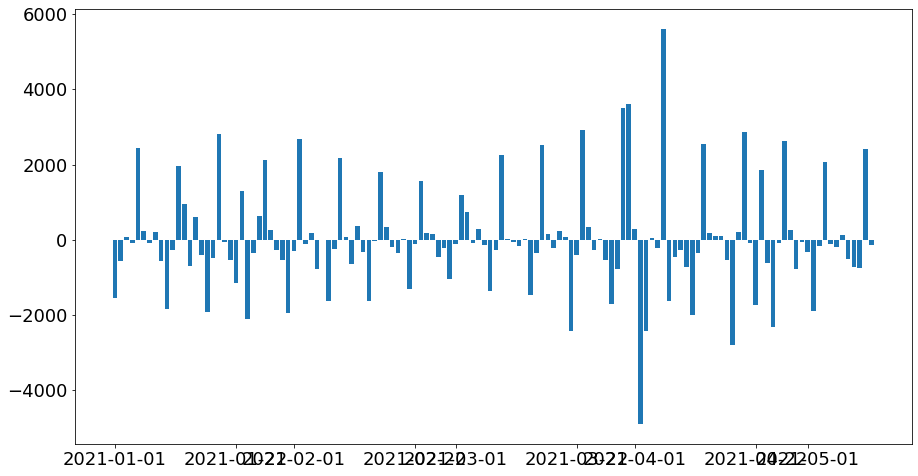

In [77]:
plt.bar(dados_sp_2021['datahora'], dados_sp_2021['taxa_de_crescimento_casos'])

In [78]:
dados_sp['media_movel_casos'] = dados_sp['casos_novos'].rolling(window=7, center=False).mean()
dados_sp['media_movel_obitos'] = dados_sp['obitos_novos'].rolling(window=7, center=False).mean()

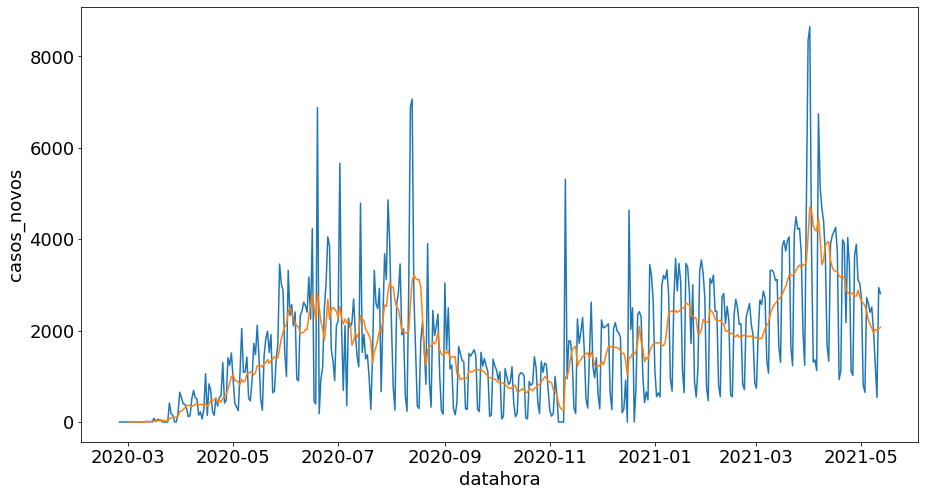

In [79]:
sns.lineplot(data=dados_sp, x='datahora', y='casos_novos')
sns.lineplot(data=dados_sp, x='datahora', y='media_movel_casos')

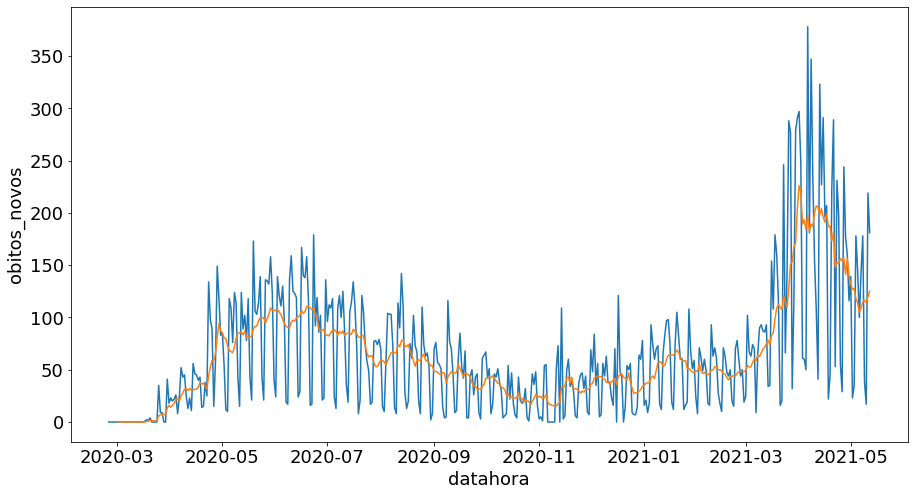

In [80]:
sns.lineplot(data=dados_sp, x='datahora', y='obitos_novos')
sns.lineplot(data=dados_sp, x='datahora', y='media_movel_obitos')

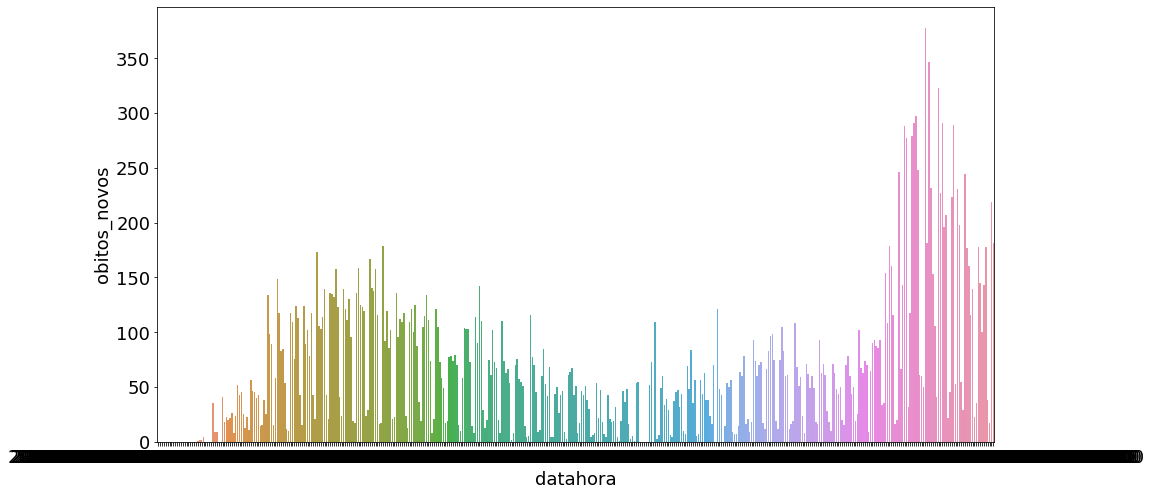

In [81]:
sns.barplot(data=dados_sp, x='datahora', y='obitos_novos')

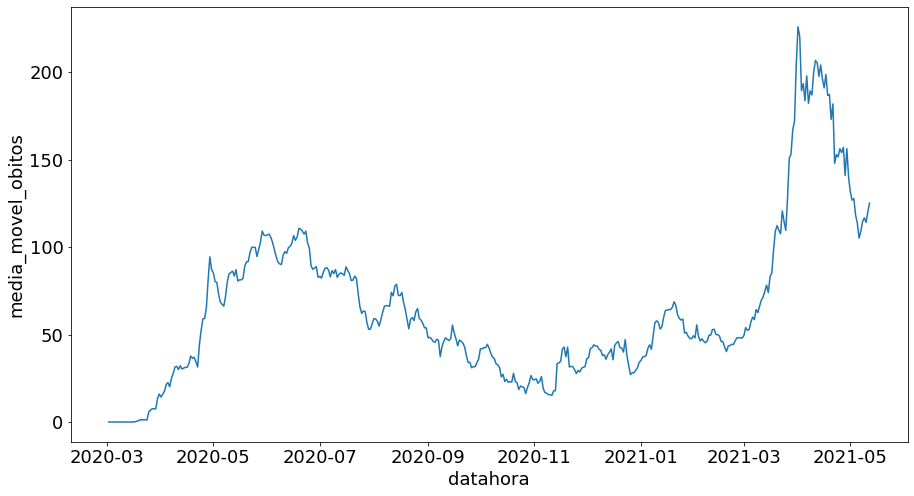

In [82]:
sns.lineplot(data=dados_sp, x='datahora', y='media_movel_obitos')

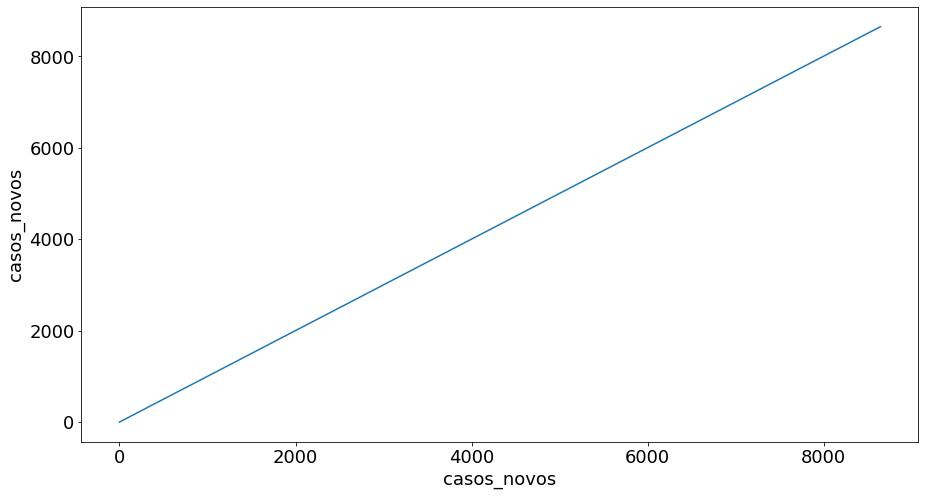

In [83]:
sns.lineplot(data=dados_sp, x='casos_novos', y='casos_novos')

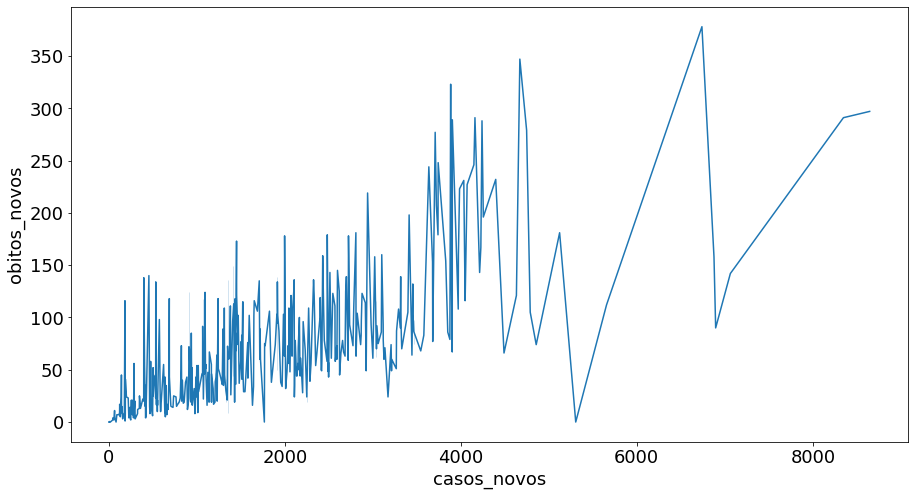

In [84]:
sns.lineplot(data=dados_sp, x='casos_novos', y='obitos_novos')

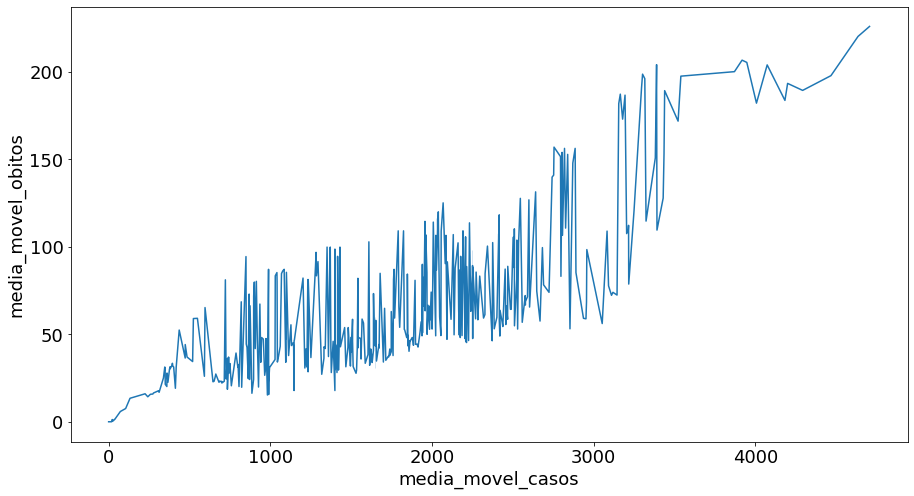

In [85]:
sns.lineplot(data=dados_sp, x='media_movel_casos', y='media_movel_obitos')

In [86]:
dados_sp_2021_01 = dados_sp.query('mes == 1 & ano == 2021')
dados_sp_2021_02 = dados_sp.query('mes == 2 & ano == 2021')

<BarContainer object of 31 artists>

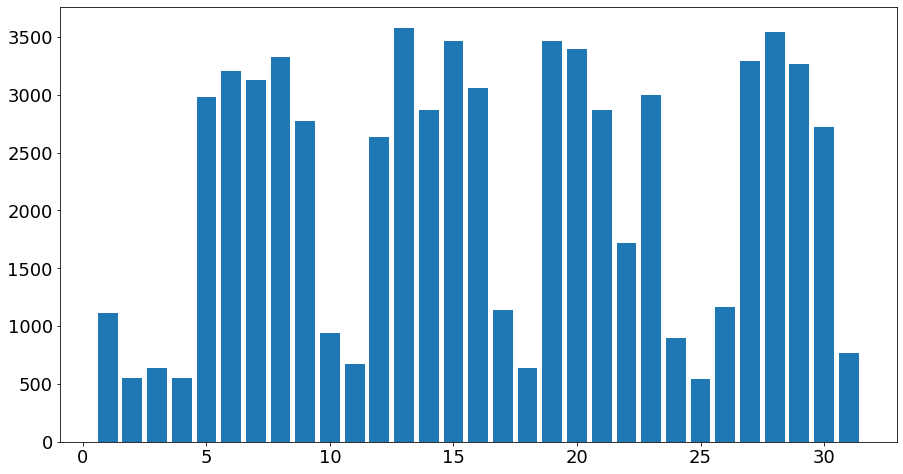

In [87]:
plt.bar(np.linspace(1,31,31),dados_sp_2021_01['casos_novos'])

<BarContainer object of 28 artists>

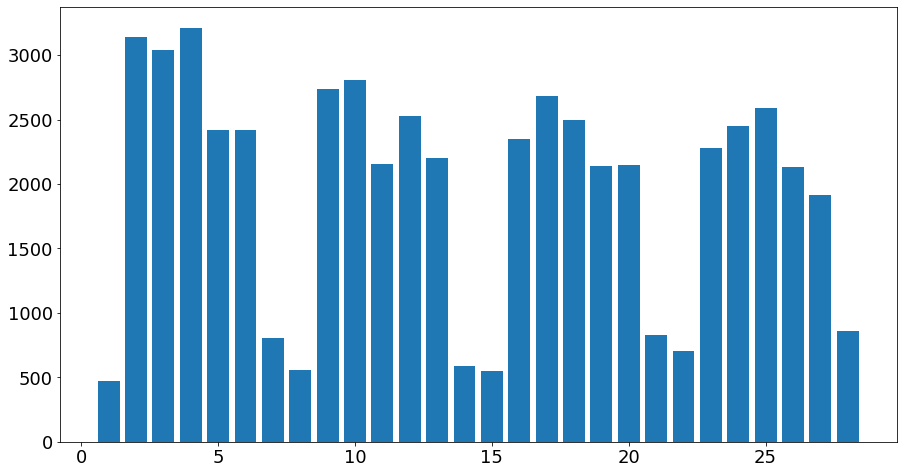

In [88]:
plt.bar(np.linspace(1,28,28),dados_sp_2021_02['casos_novos'])

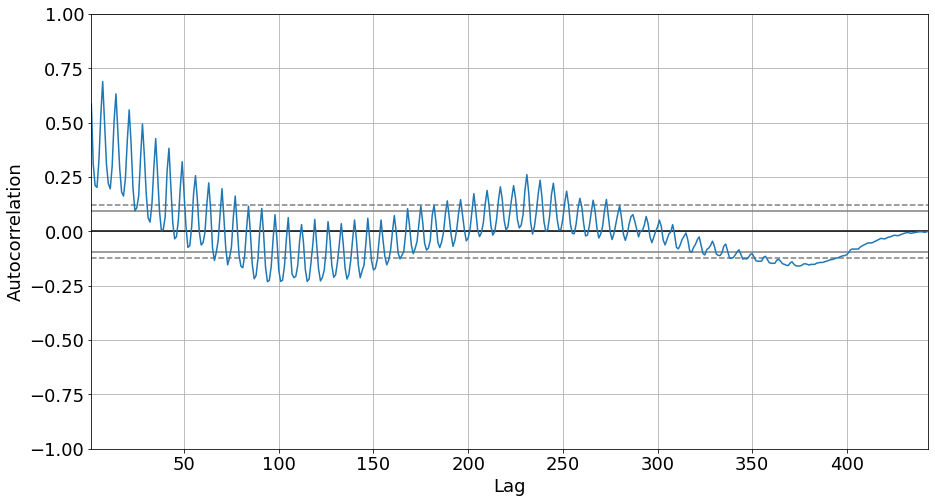

In [89]:
autocorrelation_plot(dados_sp['casos_novos'])

In [90]:
dados_sp.shape[0]

443

In [91]:
aleatorio = np.random.rand(dados_sp.shape[0])

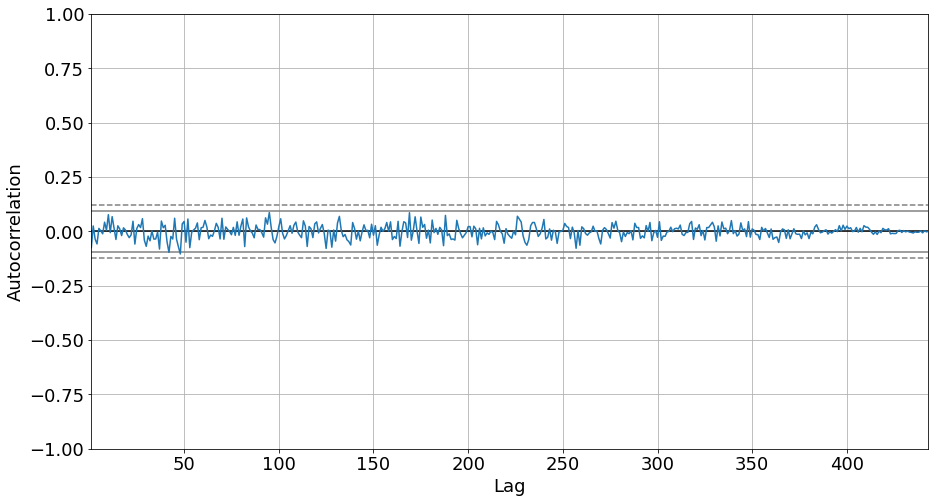

In [92]:
autocorrelation_plot(aleatorio)

In [93]:
casos = dados_sp['casos_novos']
obitos = dados_sp['obitos_novos']

cruzada = np.correlate(casos, obitos, 'full')

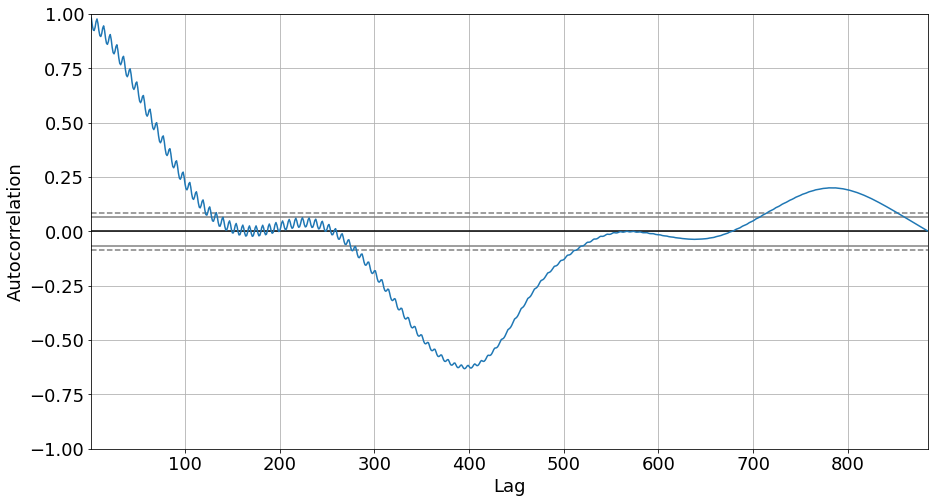

In [94]:
autocorrelation_plot(cruzada)

In [95]:
df = pd.DataFrame()

In [96]:
df['ds'] = dados_sp['datahora']

In [97]:
df['y'] = dados_sp['casos_novos']

In [98]:
from fbprophet import Prophet

In [99]:
modelo = Prophet()

In [100]:
modelo.fit(df)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [101]:
dataframefuturo = modelo.make_future_dataframe(periods=30)

In [102]:
dataframefuturo.head()

,ds
0,2020-02-25
1,2020-02-26
2,2020-02-27
3,2020-02-28
4,2020-02-29


In [103]:
previsao = modelo.predict(dataframefuturo)

In [104]:
previsao.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-02-25,-114.303728,-809.155274,1500.141042,-114.303728,-114.303728,500.316952,500.316952,500.316952,500.316952,500.316952,500.316952,0.0,0.0,0.0,386.013224
1,2020-02-26,-96.932780,-703.572058,1658.222115,-96.932780,-96.932780,554.767711,554.767711,554.767711,554.767711,554.767711,554.767711,0.0,0.0,0.0,457.834930
2,2020-02-27,-79.561833,-603.545688,1788.105021,-79.561833,-79.561833,650.710000,650.710000,650.710000,650.710000,650.710000,650.710000,0.0,0.0,0.0,571.148167
3,2020-02-28,-62.190885,-931.370299,1437.757215,-62.190885,-62.190885,368.442066,368.442066,368.442066,368.442066,368.442066,368.442066,0.0,0.0,0.0,306.251181
4,2020-02-29,-44.819937,-1138.884365,1157.448461,-44.819937,-44.819937,30.824737,30.824737,30.824737,30.824737,30.824737,30.824737,0.0,0.0,0.0,-13.995200


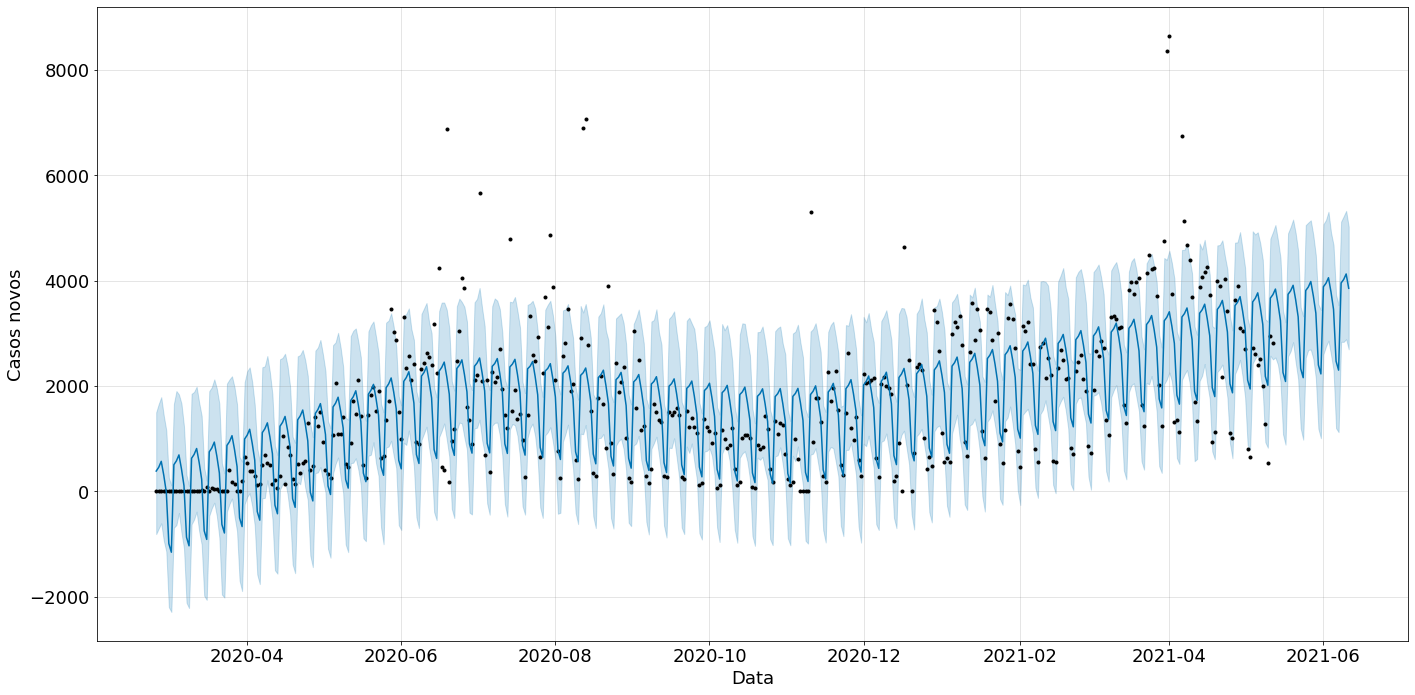

In [105]:
modelo.plot(previsao,xlabel='Data',ylabel='Casos novos',figsize=(20,10));